In [81]:
def normalize(X):
    f = X.shape[1]
    for i in range(f):
        mean = X[:,i].mean()
        std = X[:,i].std()
        X[:,i] = (X[:,i]-mean)/std
    
    return X

def train_test_split(X,y):
    n = X.shape[0]
    trainX = X[:n-100,:]
    trainy = y[:n-100]
    testX = X[n-100:,:]
    testy = y[n-100:]
    
    return trainX, trainy, testX, testy

def kfold(X,y,k):
    n = X.shape[0]
    nSample = int(np.ceil(n/k))
    Xfold = {}
    yfold = {}
    
    for i in range(k):
        if i!=k:
            Xfold[i] = X[i*nSample:(i+1)*nSample,:]
            yfold[i] = y[i*nSample:(i+1)*nSample]
        else:
            Xfold[i] = X[i*nSample:,:]
            yfold[i] = y[i*nSample:]
    
    return Xfold,yfold

def get_lrn_val(Xfold,yfold,i,k):
    Xval = Xfold[i]
    yval = yfold[i]
    
    m = Xfold[0].shape[1]
    Xlrn = np.empty((0,m))
    ylrn = np.empty((0,))
    for j in range(k):
        if j != i:
            Xlrn = np.concatenate((Xlrn,Xfold[j]),axis=0)
            ylrn = np.concatenate((ylrn,yfold[j]))
    
    return Xlrn,ylrn,Xval,yval

In [82]:
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metric
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

# Read data
july = pd.read_csv('july2020_final_data.csv')

#output = july['Close']
#july = july.drop(['Close'],axis=1)

print("data size: ",july.shape)
july.head(10)

data size:  (748, 15)


,Date,Close,Likes,Retweets,percent,None,D0,D1,D2,D3,D4,average_sum,SP500Close,SoyBeanPrice,CottonPrice
0,2016-11-14,947.00,0,0,0.000000,394212.1571,128405.2622,78341.65476,8442.330617,575.176943,0.0,0.137083,2164.199951,9.8425,0.6890
1,2016-11-15,945.50,307302,88748,0.018182,405647.2600,126862.9900,80946.66000,8538.740000,602.400000,0.0,0.138003,2180.389893,9.8950,0.7069
2,2016-11-16,946.00,476359,129277,0.000000,340811.8070,169833.3039,62498.96125,38253.977530,843.800345,0.0,0.138027,2176.939941,9.8575,0.7213
3,2016-11-17,951.75,96513,21195,0.000000,366028.2145,170618.7184,59970.77320,39739.127180,855.679845,0.0,0.137326,2187.120117,9.8950,0.7338
4,2016-11-18,944.75,406210,112886,0.000000,345566.9369,166213.3541,61339.80197,39362.171960,878.144797,0.0,0.137527,2181.899902,9.9375,0.7340
5,2016-11-21,956.50,102370,41867,0.125000,340240.1182,181148.2864,62479.49144,38016.763640,872.415261,0.0,0.138289,2198.179932,10.2025,0.7360
6,2016-11-22,958.50,628246,150630,0.107143,348793.3500,173412.9200,60111.97000,39405.520000,874.280000,0.0,0.138070,2202.939941,10.3000,0.7372
7,2016-11-23,956.00,132520,27657,0.038462,339673.5644,195987.0004,65264.17114,28301.537150,260.365597,0.0,0.137553,2204.719971,10.3425,0.7308
8,2016-11-25,962.50,0,0,0.000000,351031.7992,182714.6190,69650.71284,29895.465600,246.489419,0.0,0.137168,2213.350098,10.4600,0.7237
9,2016-11-28,967.25,255314,69557,0.000000,326506.5182,184622.1441,63931.84946,29492.910400,260.955181,0.0,0.138264,2201.719971,10.5600,0.7277


In [94]:
# Encode input X and output y
a = 2
n = july.shape[0]
f = july.shape[1]
X = np.array([[july.iloc[i-1,1:],july.iloc[i,1:]] for i in range(a-1,n-5)]).reshape((n-5-(a-1),(f-1)*a))
y = {}
for j in range(5):
    y[j] = np.array([july.loc[i,'Close'] for i in range(a+j,n-5+j+1)])

print('X size: ', X.shape, ' y size: ', y[0].shape)

### We have 743 samples

X size:  (742, 28)  y size:  (742,)


### Linear Regression

Linear Regression
Train Error:  [ 38.94781986  70.06577853  99.35735179 124.80512073 146.1337972 ] 

Test Error:  [ 63.4226525  101.24817273 145.82389781 194.56552579 237.21363373] 



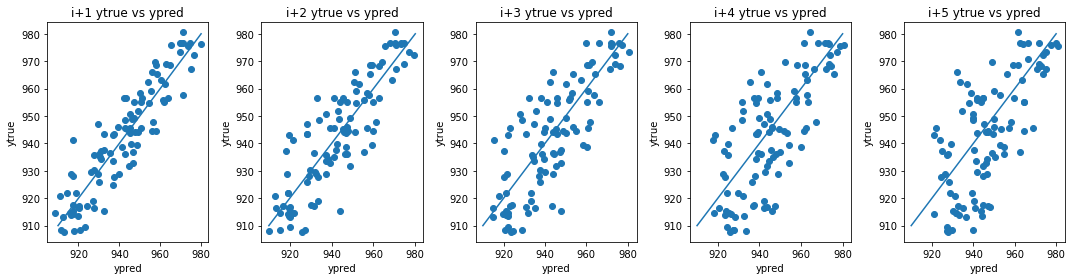

In [113]:
print('Linear Regression')

# Perform normalization on X
X = normalize(X)

trainError = np.zeros((5,))
testError = np.zeros((5,))

# Plot subplot
fig, axs = plt.subplots(1,5, tight_layout=True, figsize = (15,4))

# For each y, perform linear regression
for i in range(5):
    
    Xtrain, ytrain, Xtest, ytest = train_test_split(X,y[i])

    linearModel = LinearRegression()
    linearModel.fit(Xtrain,ytrain)
    ypredTrain = linearModel.predict(Xtrain)
    trainError[i] = metric.mean_squared_error(ytrain,ypredTrain)

    ypredTest = linearModel.predict(Xtest)
    testError[i] = metric.mean_squared_error(ytest,ypredTest)
    
    # plot predicted y vs true y
    h = axs[i].scatter(ypredTest,ytest)
    h = axs[i].plot(np.linspace(910,980),np.linspace(910,980))
    h = axs[i].set_title('i+%d ytrue vs ypred' % (i+1))
    h = axs[i].set_xlabel('ypred')
    h = axs[i].set_ylabel('ytrue')

print('Train Error: ', trainError, '\n')
print('Test Error: ', testError, '\n')

In [101]:
linearModel.coef_

array([ 7.77907167, -0.95495861,  0.18633352, -0.26486892, -8.67146805,
        1.52812271, -1.71190035, -2.04539897,  3.27731405, -1.04126592,
       -4.55523445, -5.43657124, -5.03994952, -3.15295712, 18.6110611 ,
        0.57887594, -1.56335249, -0.27090657, -6.5807319 , -8.83072721,
        0.53397008, -0.19586685, -0.3170521 , -3.77403724, -2.00691487,
        1.40691812,  4.12631837, -2.18691784])

### Projection Pursuit

Projection Pursuit
For model 0 - opt r:  2  opt val error:  107.09933810069865  train error:  36.973566541760164  test error:  353.57620085718537
For model 1 - opt r:  1  opt val error:  115.69583689714882  train error:  69.46028219280598  test error:  101.4725306803336
For model 2 - opt r:  1  opt val error:  344.09638587375713  train error:  97.55088297177704  test error:  145.67898441436407
For model 3 - opt r:  1  opt val error:  253.25094319353508  train error:  122.6497253298152  test error:  193.90224175004911
For model 4 - opt r:  1  opt val error:  358.8875993069117  train error:  142.1697416597727  test error:  244.7535697000642


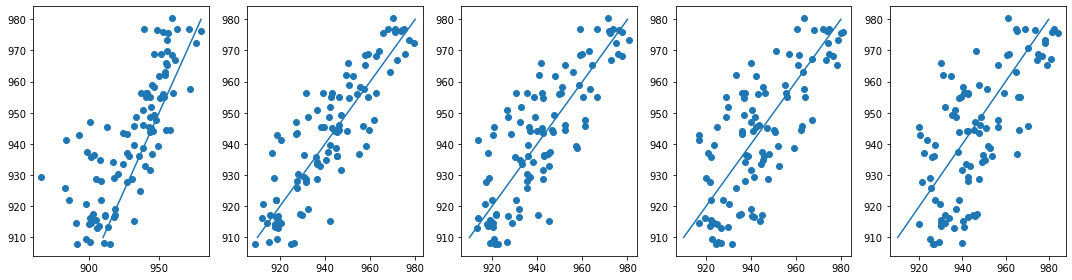

In [102]:
### Projection Pursuit
from skpp import ProjectionPursuitRegressor
print('Projection Pursuit')

# PP Parameter
units = [1, 2, 3, 4, 5, 6, 7, 8]

# Plot subplot
fig, axs = plt.subplots(1,5, tight_layout=True, figsize = (15,4))

# For each y, perform projection pursuit
for i in range(5):
    Xtrain, ytrain, Xtest, ytest = train_test_split(X,y[i])
    
    # Split into 5-fold for complexity tuning
    K = 5
    Xfold,yfold = kfold(Xtrain,ytrain,K)
    
    # For each parameter unit
    avgLrnError = np.zeros((len(units),))
    avgValError = np.zeros((len(units),))
    for idx,unit in enumerate(units): 
    
        # for each fold
        lrnError=np.zeros((K,))
        valError=np.zeros((K,))
        for k in range(K):
            Xlrn,ylrn,Xval,yval=get_lrn_val(Xfold,yfold,k,K)

            model = ProjectionPursuitRegressor(r=unit)
            ypred_lrn = model.fit(Xlrn,ylrn).predict(Xlrn)
            lrnError[k] = metric.mean_squared_error(ylrn,ypred_lrn)

            ypred_val = model.predict(Xval)
            valError[k] = metric.mean_squared_error(yval,ypred_val)
        
        # Find average lrn and val error
        avgLrnError[idx] = lrnError.mean()
        avgValError[idx] = valError.mean()
    
    # Find lowest validation error and its corresponding parameter
    opt_unit = units[np.argmin(avgValError)]
    opt_val_error = np.min(avgValError)
    
    # Train using all training data on the optimal unit
    opt_model = ProjectionPursuitRegressor(r=opt_unit)
    ypred_trn = opt_model.fit(Xtrain,ytrain).predict(Xtrain)
    trnError = metric.mean_squared_error(ytrain,ypred_trn)
    
    # Test
    ypred_tst = opt_model.predict(Xtest)
    tstError = metric.mean_squared_error(ytest,ypred_tst)
    
    print('For model %d - opt r: ' % (i), opt_unit, ' opt val error: ',opt_val_error, ' train error: ', trnError, ' test error: ', tstError)
    
    # plot predicted y vs true y
    h = axs[i].scatter(ypred_tst,ytest)
    h = axs[i].plot(np.linspace(910,980),np.linspace(910,980))

### Ridge Regression

Ridge Regression
For model 0 - opt alpha:  1  opt val:  49.1858  train error:  38.9853  test error:  63.0104
For model 1 - opt alpha:  2  opt val:  101.5631  train error:  70.1763  test error:  100.8841
For model 2 - opt alpha:  2  opt val:  154.1941  train error:  99.5329  test error:  145.3299
For model 3 - opt alpha:  1  opt val:  212.2405  train error:  124.8372  test error:  194.3776
For model 4 - opt alpha:  4  opt val:  280.4857  train error:  146.5817  test error:  236.7611


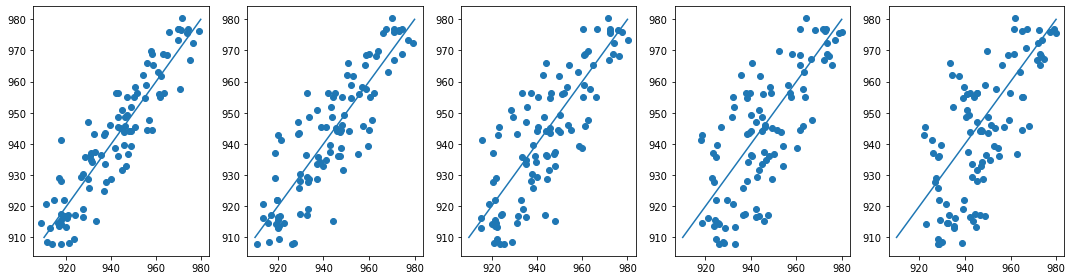

In [103]:
### Ridge Regression
from sklearn.linear_model import Ridge
print('Ridge Regression')

# alpha Parameter
units = [2**i for i in range(-10,10)]

# Plot subplot
fig, axs = plt.subplots(1,5, tight_layout=True, figsize = (15,4))

# For each y, perform ridge regression
for i in range(5):
    Xtrain, ytrain, Xtest, ytest = train_test_split(X,y[i])
    
    # Split into 5-fold for complexity tuning
    K = 5
    Xfold,yfold = kfold(Xtrain,ytrain,K)
    
    # For each parameter unit
    avgLrnError = np.zeros((len(units),))
    avgValError = np.zeros((len(units),))
    for idx,unit in enumerate(units): 
    
        # for each fold
        lrnError=np.zeros((K,))
        valError=np.zeros((K,))
        for k in range(K):
            Xlrn,ylrn,Xval,yval=get_lrn_val(Xfold,yfold,k,K)

            model = Ridge(alpha=unit)
            ypred_lrn = model.fit(Xlrn,ylrn).predict(Xlrn)
            lrnError[k] = metric.mean_squared_error(ylrn,ypred_lrn)

            ypred_val = model.predict(Xval)
            valError[k] = metric.mean_squared_error(yval,ypred_val)
        
        # Find average lrn and val error
        avgLrnError[idx] = lrnError.mean()
        avgValError[idx] = valError.mean()
    
    # Find lowest validation error and its corresponding parameter
    opt_unit = units[np.argmin(avgValError)]
    opt_val_error = np.min(avgValError)
    
    # Train using all training data on the optimal unit
    opt_model = Ridge(alpha=opt_unit)
    ypred_trn = opt_model.fit(Xtrain,ytrain).predict(Xtrain)
    trnError = metric.mean_squared_error(ytrain,ypred_trn)
    
    # Test
    ypred_tst = opt_model.predict(Xtest)
    tstError = metric.mean_squared_error(ytest,ypred_tst)
    
    print('For model %d - opt alpha: ' % (i), opt_unit, ' opt val: ', round(opt_val_error,4), ' train error: ', round(trnError,4), ' test error: ', round(tstError,4))
    
    # plot predicted y vs true y
    h = axs[i].scatter(ypred_tst,ytest)
    h = axs[i].plot(np.linspace(910,980),np.linspace(910,980))

### LASSO

LASSO Regression
For model 0 - opt alpha:  0.25  opt val:  45.1586  train error:  41.2224  test error:  57.126
For model 1 - opt alpha:  0.5  opt val:  85.8464  train error:  75.0824  test error:  98.6689
For model 2 - opt alpha:  0.5  opt val:  131.2301  train error:  107.4109  test error:  143.3786
For model 3 - opt alpha:  1  opt val:  175.2453  train error:  138.03  test error:  189.9135
For model 4 - opt alpha:  1  opt val:  223.3141  train error:  163.7951  test error:  232.1579


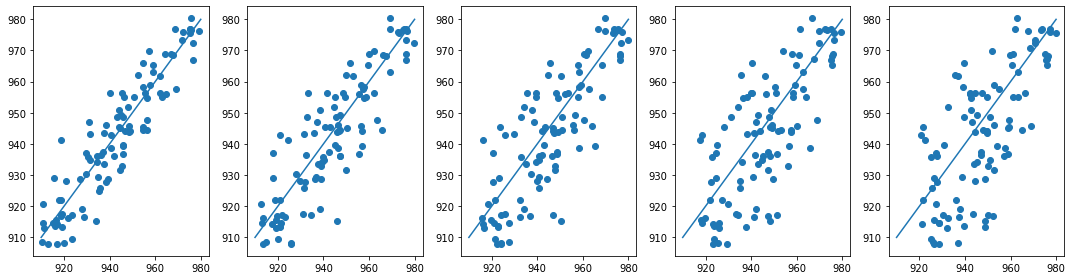

In [112]:
### Ridge Regression
from sklearn.linear_model import Lasso
print('LASSO Regression')

# alpha Parameter
units = [2**i for i in range(-10,10)]

# Plot subplot
fig, axs = plt.subplots(1,5, tight_layout=True, figsize = (15,4))

# For each y, perform ridge regression
for i in range(5):
    
    Xtrain, ytrain, Xtest, ytest = train_test_split(X,y[i])
    
    # Split into 5-fold for complexity tuning
    K = 5
    Xfold,yfold = kfold(Xtrain,ytrain,K)
    
    # For each parameter unit
    avgLrnError = np.zeros((len(units),))
    avgValError = np.zeros((len(units),))
    for idx,unit in enumerate(units): 
    
        # for each fold
        lrnError=np.zeros((K,))
        valError=np.zeros((K,))
        for k in range(K):
            Xlrn,ylrn,Xval,yval=get_lrn_val(Xfold,yfold,k,K)

            model = Lasso(alpha=unit,max_iter=10000)
            ypred_lrn = model.fit(Xlrn,ylrn).predict(Xlrn)
            lrnError[k] = metric.mean_squared_error(ylrn,ypred_lrn)

            ypred_val = model.predict(Xval)
            valError[k] = metric.mean_squared_error(yval,ypred_val)
        
        # Find average lrn and val error
        avgLrnError[idx] = lrnError.mean()
        avgValError[idx] = valError.mean()
    
    # Find lowest validation error and its corresponding parameter
    opt_unit = units[np.argmin(avgValError)]
    opt_val_error = np.min(avgValError)
    
    # Train using all training data on the optimal unit
    opt_model = Lasso(alpha=opt_unit,max_iter=10000)
    ypred_trn = opt_model.fit(Xtrain,ytrain).predict(Xtrain)
    trnError = metric.mean_squared_error(ytrain,ypred_trn)
    
    # Test
    ypred_tst = opt_model.predict(Xtest)
    tstError = metric.mean_squared_error(ytest,ypred_tst)
    
    print('For model %d - opt alpha: ' % (i), opt_unit, ' opt val: ', round(opt_val_error,4), ' train error: ', round(trnError,4), ' test error: ', round(tstError,4))
    
    # plot predicted y vs true y
    h = axs[i].scatter(ypred_tst,ytest)
    h = axs[i].plot(np.linspace(910,980),np.linspace(910,980))

In [114]:
opt_model.coef_

array([ 1.41135757, -0.        , -0.        , -0.        , -1.0357007 ,
        0.        ,  0.        ,  0.48803814,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -1.63511157, 23.82118071,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        1.12498552,  0.        ,  0.        , -1.50290078,  0.        ,
       -0.        ,  0.        , -0.        ])

### Linear SVR

Linear SVR
For model 0 - opt eps: 1 opt C: 8  train error:  39.8139  test error:  64.8085
For model 1 - opt eps: 2 opt C: 4  train error:  71.5125  test error:  112.9649
For model 2 - opt eps: 4 opt C: 8  train error:  100.6117  test error:  155.3407
For model 3 - opt eps: 6 opt C: 8  train error:  126.4217  test error:  181.7346
For model 4 - opt eps: 3 opt C: 4  train error:  152.394  test error:  215.302


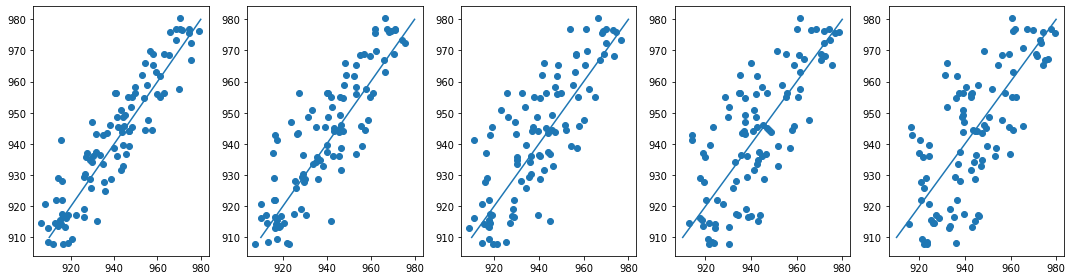

In [115]:
from sklearn.svm import SVR
print('Linear SVR')

# eps Parameter
units = [i for i in range(0,10)]

# C parameter
units2 = [2**i for i in range(-10,10)]

# Plot subplot
fig, axs = plt.subplots(1,5, tight_layout=True, figsize = (15,4))

# For each y, perform linear SVR
for i in range(5):
    Xtrain, ytrain, Xtest, ytest = train_test_split(X,y[i])
    
    # Split into 5-fold for complexity tuning
    K = 5
    Xfold,yfold = kfold(Xtrain,ytrain,K)
    
    # For each parameter unit
    avgLrnError = np.zeros((len(units),len(units2)))
    avgValError = np.zeros((len(units),len(units2)))
    for idx,unit in enumerate(units): 
        for idx2,unit2 in enumerate(units2):
    
            # for each fold
            lrnError=np.zeros((K,))
            valError=np.zeros((K,))
            for k in range(K):
                Xlrn,ylrn,Xval,yval=get_lrn_val(Xfold,yfold,k,K)

                model = SVR(C=unit2,epsilon=unit,kernel='linear')
                ypred_lrn = model.fit(Xlrn,ylrn).predict(Xlrn)
                lrnError[k] = metric.mean_squared_error(ylrn,ypred_lrn)

                ypred_val = model.predict(Xval)
                valError[k] = metric.mean_squared_error(yval,ypred_val)

            # Find average lrn and val error
            avgLrnError[idx,idx2] = lrnError.mean()
            avgValError[idx,idx2] = valError.mean()
    
    # Find lowest validation error and its corresponding parameter
    opt_params = np.unravel_index(np.argmin(avgValError, axis=None), avgValError.shape)
    opt_unit = units[opt_params[0]]
    opt_unit2 = units2[opt_params[1]]
    opt_val_error = np.min(avgValError)
    
    # Train using all training data on the optimal unit
    opt_model = SVR(C=opt_unit2,epsilon=opt_unit,kernel='linear')
    ypred_trn = opt_model.fit(Xtrain,ytrain).predict(Xtrain)
    trnError = metric.mean_squared_error(ytrain,ypred_trn)
    
    # Test
    ypred_tst = opt_model.predict(Xtest)
    tstError = metric.mean_squared_error(ytest,ypred_tst)
    
    print('For model %d - opt eps:' % (i), opt_unit, 'opt C:', opt_unit2, ' train error: ', round(trnError,4), ' test error: ', round(tstError,4))
    
    # plot predicted y vs true y
    h = axs[i].scatter(ypred_tst,ytest)
    h = axs[i].plot(np.linspace(910,980),np.linspace(910,980))

### RBF SVR

RBF SVR
For model 0 - opt eps: 4 opt C: 512  opt gamma:  0.0009765625  opt val:  56.7432  train error:  38.7069  test error:  64.874
For model 1 - opt eps: 1 opt C: 512  opt gamma:  0.0009765625  opt val:  105.9774  train error:  68.2604  test error:  100.242
For model 2 - opt eps: 4 opt C: 512  opt gamma:  0.0009765625  opt val:  163.1878  train error:  95.6675  test error:  145.7931
For model 3 - opt eps: 6 opt C: 512  opt gamma:  0.0009765625  opt val:  221.7117  train error:  118.4469  test error:  192.7301
For model 4 - opt eps: 1 opt C: 512  opt gamma:  0.001953125  opt val:  275.9513  train error:  124.0629  test error:  233.8874


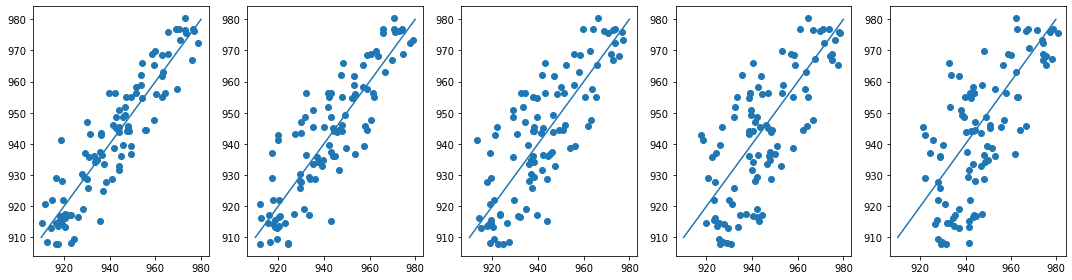

In [118]:
from sklearn.svm import SVR
print('RBF SVR')

# eps Parameter
units = [i for i in range(0,10)]

# gamma parameter
units2 = [2**i for i in range(-15,0)]

# C parameter
units3 = [2**i for i in range(0,10)]

# Plot subplot
fig, axs = plt.subplots(1,5, tight_layout=True, figsize = (15,4))

# For each y, perform linear SVR
for i in range(5):
    Xtrain, ytrain, Xtest, ytest = train_test_split(X,y[i])
    
    '''
    # Determine C
    C1 = np.abs(ytrain[i].mean() + 3 * ytrain[i].std())
    C2 = np.abs(ytrain[i].mean() - 3 * ytrain[i].std())
    Cval = np.maximum(C1,C2)
    '''
    
    # Split into 5-fold for complexity tuning
    K = 5
    Xfold,yfold = kfold(Xtrain,ytrain,K)
    
    # For each parameter unit
    avgLrnError = np.zeros((len(units),len(units2),len(units3)))
    avgValError = np.zeros((len(units),len(units2),len(units3)))
    for idx,unit in enumerate(units): 
        for idx2,unit2 in enumerate(units2):
            for idx3,unit3 in enumerate(units3):
    
                # for each fold
                lrnError=np.zeros((K,))
                valError=np.zeros((K,))
                for k in range(K):
                    Xlrn,ylrn,Xval,yval=get_lrn_val(Xfold,yfold,k,K)

                    model = SVR(C=unit3,epsilon=unit,gamma=unit2,kernel='rbf')
                    ypred_lrn = model.fit(Xlrn,ylrn).predict(Xlrn)
                    lrnError[k] = metric.mean_squared_error(ylrn,ypred_lrn)

                    ypred_val = model.predict(Xval)
                    valError[k] = metric.mean_squared_error(yval,ypred_val)

                # Find average lrn and val error
                avgLrnError[idx,idx2,idx3] = lrnError.mean()
                avgValError[idx,idx2,idx3] = valError.mean()
    
    # Find lowest validation error and its corresponding parameter
    opt_params = np.unravel_index(np.argmin(avgValError, axis=None), avgValError.shape)
    opt_unit = units[opt_params[0]]
    opt_unit2 = units2[opt_params[1]]
    opt_unit3 = units3[opt_params[2]]
    opt_val_error = np.min(avgValError)
    
    # Train using all training data on the optimal unit
    opt_model = SVR(C=opt_unit3,epsilon=opt_unit,gamma=opt_unit2,kernel='rbf')
    ypred_trn = opt_model.fit(Xtrain,ytrain).predict(Xtrain)
    trnError = metric.mean_squared_error(ytrain,ypred_trn)
    
    # Test
    ypred_tst = opt_model.predict(Xtest)
    tstError = metric.mean_squared_error(ytest,ypred_tst)
    
    print('For model %d - opt eps:' % (i), opt_unit, 'opt C:', opt_unit3, ' opt gamma: ', opt_unit2, ' opt val: ', round(opt_val_error,4),' train error: ', round(trnError,4), ' test error: ', round(tstError,4))
    
    # plot predicted y vs true y
    h = axs[i].scatter(ypred_tst,ytest)
    h = axs[i].plot(np.linspace(910,980),np.linspace(910,980))

In [117]:
units2

[0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512]